In [2]:
install.packages('nycflights13')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
options(repr.plot.width=8, repr.plot.height=5)
library(tidyverse)
library(nycflights13)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [9]:
tbl = flights %>%
  group_by(origin, month) %>%
  summarise(n = n()) %>%
  pivot_wider(names_from = month, values_from = n)

tbl %>% print

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


# A tibble: 3 × 13
# Groups:   origin [3]
  origin   `1`   `2`   `3`   `4`   `5`   `6`   `7`   `8`   `9`  `10`  `11`  `12`
  <chr>  <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
1 EWR     9893  9107 10420 10531 10592 10175 10475 10359  9550 10104  9707  9922
2 JFK     9161  8421  9697  9218  9397  9472 10023  9983  8908  9143  8710  9146
3 LGA     7950  7423  8717  8581  8807  8596  8927  8985  9116  9642  8851  9067


## &#129300; (Warmup) Quiz

```
  origin 1    2    3     4     5     6     7     8     9    10    11   12  
1 EWR    9893 9107 10420 10531 10592 10175 10475 10359 9550 10104 9707 9922
2 JFK    9161 8421  9697  9218  9397  9472 10023  9983 8908  9143 8710 9146
3 LGA    7950 7423  8717  8581  8807  8596  8927  8985 9116  9642 8851 9067
```

How could I convert this table to a tidy format? (Check all that apply)

<ol style="list-style-type: upper-alpha;">
    <li><code>pivot_longer(tbl, 1:12)</code></li>
    <li><code>mutate(tbl, year=.column)</code></li>
    <li><code>summarize(tbl, year)</code></li>
    <li><code>pivot_longer(tbl, 2:13)</code></li>
</ol>

In [ ]:
# solution

# Lecture 5: Tidy data, missing data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Gain more experience creating and working with tidy data
* Learn about how R handles missing data.
    
This lecture note corresponds to Chapters 6 and 20 of your book. 
</div>


    




## A usage of `pivot_wider()`
Let's revisit the `gapminder` dataset that we first saw last lecture:

In [15]:
install.packages('gapminder')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
library(gapminder)
print(gapminder)

# A tibble: 1,704 × 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# … with 1,694 more rows


I want to study GDP per capita over time. If I plot **all** the data, I get something that looks like:

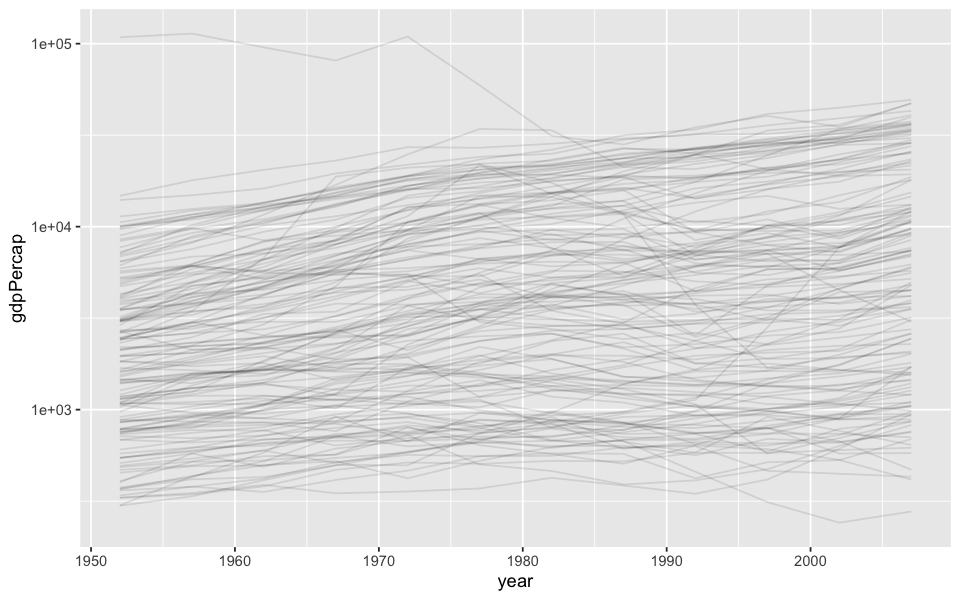

In [ ]:
ggplot(gapminder, 
aes(x = year, y=gdpPercap, group=country)) + 
  geom_line(alpha=0.1) + scale_y_log10()

Looking at all the data simultaneousy is too overwhelming. So, I'm going to summarize the data in a particular way. As a first step, we are going convert each country into a data point (row) containing all of its data side-by-side:

In [75]:
# convert gapminder to wide, placing different years of data side-by-side
col_year <- NA

Now `col_year` is a **data frame** that contains one observation per row. This enables us to ask questions about **covariation** between the data in different years.

In [ ]:
# example of covariation between two different years

## &#129300; Quiz

The correlation between a country's GDP per capita in 1952 and 2002 was:

<ol style="list-style-type: upper-alpha;">
    <li>0.0</li>
    <li>-.21</li>
    <li>1.65</li>
    <li>44822176</li>
    <li>.43</li> 
</ol>

Finally, we'll do one more trick, following Chapter 6 of the book. We will **cluster** these data in order to organize the countries into a few (hopefully) interpretable groups. 

For technical reasons, in order to do clustering, we need to convert our data frame slightly by using a function called `columns_to_rownames()`:

In [31]:
# use `columns_to_rownames()` to create a base R data frame with named rows.
col_year <- col_year %>% 
  column_to_rownames("country") 

# K-means
<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190812011831/Screenshot-2019-08-12-at-1.09.42-AM.png' />

Reference: https://www.geeksforgeeks.org/k-means-clustering-introduction/


In [33]:
cluster <- stats::kmeans(col_year, centers = 6)

Finally, we assign each country back to its cluster:

In [34]:
cluster_id <- cluster$cluster  %>% 
  enframe()  %>% 
  rename(country = name, cluster_id = value) %>% print

# A tibble: 142 × 2
   country     cluster_id
   <chr>            <int>
 1 Afghanistan          6
 2 Albania              2
 3 Algeria              2
 4 Angola               2
 5 Argentina            4
 6 Australia            5
 7 Austria              5
 8 Bahrain              5
 9 Bangladesh           6
10 Belgium              5
# … with 132 more rows


In [76]:
# join cluster_id and summarize the mean gdpPercap for each cluster and each year


Joining, by = "country"
`summarise()` has grouped output by 'cluster_id'. You can override using the
`.groups` argument.


# A tibble: 72 × 3
# Groups:   cluster_id [6]
   cluster_id  year   mean
        <int> <int>  <dbl>
 1          1  1952  4037.
 2          1  1957  4974.
 3          1  1962  6087.
 4          1  1967  7624.
 5          1  1972 10262.
 6          1  1977 11835.
 7          1  1982 13375.
 8          1  1987 15653.
 9          1  1992 17299.
10          1  1997 20176.
# … with 62 more rows


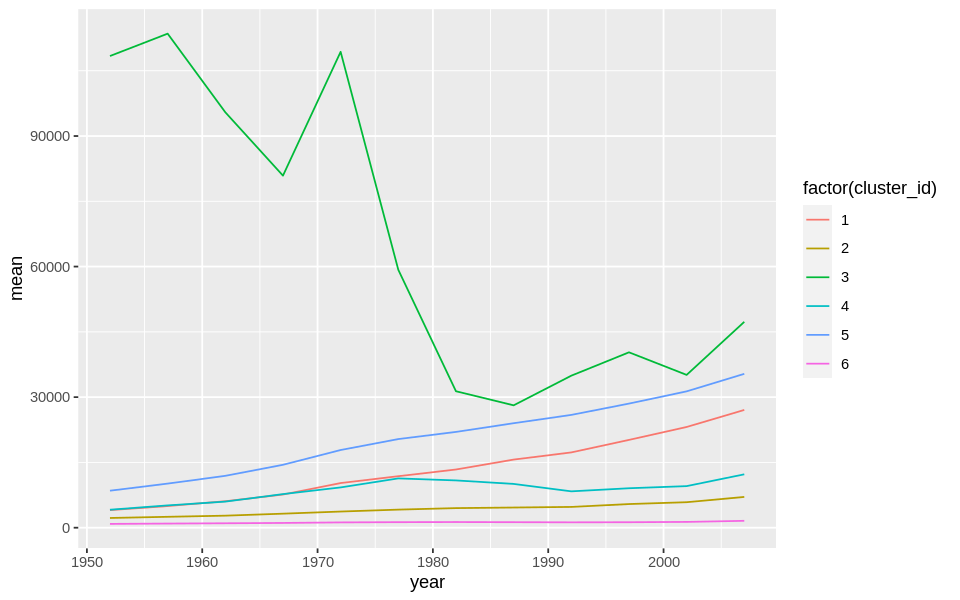

In [54]:
# plot mean gdppercap for each cluster for each year

## Missing data in R
The `gapminder` appears very nice, it only contains data sets with no missing observations. But! The raw data looks like this:

In [55]:
gapminder_unfiltered  %>% print

# A tibble: 3,313 × 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# … with 3,303 more rows


In [ ]:
What happens when we reshape the "unfiltered" data?

In [58]:
# pivot unfiltered data wider
gapminder_unfiltered %>% 
  pivot_wider(id_cols = country, names_from = year, values_from = gdpPercap) %>%
  print

# A tibble: 187 × 59
   country `1952` `1957` `1962` `1967` `1972` `1977` `1982` `1987` `1992` `1997`
   <fct>    <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 Afghan…   779.   821.   853.   836.   740.   786.   978.   852.   649.   635.
 2 Albania  1601.  1942.  2313.  2760.  3313.  3533.  3631.  3739.  2497.  3193.
 3 Algeria  2449.  3014.  2551.  3247.  4183.  4910.  5745.  5681.  5023.  4797.
 4 Angola   3521.  3828.  4269.  5523.  5473.  3009.  2757.  2430.  2628.  2277.
 5 Argent…  5911.  6857.  7133.  8053.  9443. 10079.  8998.  9140.  9308. 10967.
 6 Armenia    NA     NA     NA     NA     NA     NA     NA     NA   1443.  1791.
 7 Aruba      NA     NA     NA     NA   4940.  7390. 10875. 17674. 25121. 26484.
 8 Austra… 10040. 10950. 12217. 14526. 16789. 18334. 19477. 21889. 23425. 26998.
 9 Austria  6137.  8843. 10751. 12835. 16662. 19749. 21597. 23688. 27042. 29096.
10 Azerba…    NA     NA     NA     NA     NA     NA     NA     NA   3456.  1943.
# … wit

You can see that there are many missing observations in the unfiltered data. In real life, you will mostly get unfiltered data -- how should we handle missing data?

## Missing Values
Missing values can be:

* **Explicit** (marked as `NA` in our data); or
* **Implicit** (not present in the data).

In [59]:
treatment <- tribble(
  ~person,           ~treatment, ~response,
  "Derrick Whitmore", 1,         7,
  NA,                 2,         10,
  NA,                 3,         NA,
  "Katherine Burke",  1,         4
)

In [60]:
treatment

person           treatment response
1 Derrick Whitmore 1          7      
2 NA               2         10      
3 NA               3         NA      
4 Katherine Burke  1          4

The missing values are **explicit** in this table: each missing value is indicated by `NA` in the table.

You can fill in these missing values with `tidyr::fill()`. It works like `select()`, taking a set of columns, and fills them in with the last non-missing value.

In [ ]:
# fill treament for person and response columns

In [ ]:
# fill in each missing value in gapminder_unfiltered carrying forward


## Encoded missing data

Sometimes, data contain a concrete value that actually represents a missing value. You see this often when dealing with data that is imported from a format that does not have a way to represent missing values, such as text or CSV. So it must instead use some special value like 99 or -999.

## Example: Billionaires



The following command loads a dataset called "bil", which contains information on the world's billionaires:

In [64]:
load(url("https://datasets.stats306.org/bil.RData"))
summary(bil)

      age          category         citizenship        company.name      
 Min.   :-1.00   Length:2614        Length:2614        Length:2614       
 1st Qu.:47.00   Class :character   Class :character   Class :character  
 Median :59.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :53.21                                                           
 3rd Qu.:70.00                                                           
 Max.   :98.00                                                           
                                                                         
 company.type       country code          founded     from emerging     
 Length:2614        Length:2614        Min.   :1610   Length:2614       
 Class :character   Class :character   1st Qu.:1938   Class :character  
 Mode  :character   Mode  :character   Median :1963   Mode  :character  
                                       Mean   :1955                     
                                       3rd 

## &#129300; Quiz

The average age of a billionaire in this dataset is:

<ol style="list-style-type: upper-alpha;">
    <li>28.1</li>
    <li>Something else/cannot be determined</li>
    <li>53.2</li>
    <li>78.3</li>
    <li>62.6</li> 
</ol>

To correct for this type of missing value, we can use a function called `na_if(x, n)`. This takes a vector `x` and replaces any occurence of `n` with `NA`:

In [ ]:
na_if(c(-99, 1, 3, -99, 2), -99)

[1] NA  1  3 NA  2

In [92]:
# use na_if to mark missing values in bil


# A tibble: 6 × 22
    age category  citiz…¹ compa…² compa…³ count…⁴ founded from …⁵     gdp gender
  <int> <chr>     <chr>   <chr>   <chr>   <chr>     <int> <chr>     <dbl> <chr> 
1    NA Financial Saudi … Rolaco… new     SAU        1968 True    1.58e11 male  
2    34 Financial United… Fideli… new     USA        1946 True    8.1 e12 female
3    59 Non-Trad… Brazil  Compan… new     BRA        1948 True    8.54e11 male  
4    61 New Sect… Germany Ratiop… new     DEU        1881 True    2.5 e12 male  
5    NA Financial Hong K… Swire   new     HKG        1816 True    1.6 e11 male  
6    NA Traded S… Bahrain YBA Ka… new     BHR        1890 True    6.1 e 9 male  
# … with 12 more variables: industry <chr>, inherited <chr>, name <chr>,
#   rank <int>, region <chr>, relationship <chr>, sector <chr>,
#   `was founder` <chr>, `was political` <chr>, wealth.type <chr>,
#   `worth in billions` <dbl>, year <int>, and abbreviated variable names
#   ¹​citizenship, ²​company.name, ³​company.type, ⁴​`c

## Implicit missing values
A second type of missing data occurs when there are simply no observations in the dataset for a particular combination of columns. For example:

In [69]:
stocks <- tibble(
  year  = c(2020, 2020, 2020, 2020, 2021, 2021, 2021),
  qtr   = c(   1,    2,    3,    4,    2,    3,    4),
  price = c(1.88, 0.59, 0.35,   NA, 0.92, 0.17, 2.66)
)

In [70]:
print(stocks)

# A tibble: 7 × 3
   year   qtr price
  <dbl> <dbl> <dbl>
1  2020     1  1.88
2  2020     2  0.59
3  2020     3  0.35
4  2020     4 NA   
5  2021     2  0.92
6  2021     3  0.17
7  2021     4  2.66


This dataset has two missing observations:
- The price in the 2020q4 is explicitly missing. (It has an `NA`.)
- The price in 2021q1 is implicitly missing: it does not appear in the dataset.

> An explicit missing value is the presence of an absence.
>
> An implicit missing value is the absence of a presence.


How can we handle implicit missing values? As we have already seen, one option is to use `pivot_wider()`:

In [71]:
# using pivot_wider() on stocks converts implicit missing values to explicit


# A tibble: 2 × 5
   year   `1`   `2`   `3`   `4`
  <dbl> <dbl> <dbl> <dbl> <dbl>
1  2020  1.88  0.59  0.35 NA   
2  2021 NA     0.92  0.17  2.66


Alternatively, we can use the `complete()` function, which creates entries for all possible combinations of a set of columns:

In [73]:
# use complete to fill in missing values for stocks


year qtr price
1 2020 1   1.88 
2 2020 2   0.59 
3 2020 3   0.35 
4 2020 4     NA 
5 2021 1     NA 
6 2021 2   0.92 
7 2021 3   0.17 
8 2021 4   2.66

## Example: Climate data

The [Global Historical Climate Network](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) is amazing database of daily weather data going back, in some cases, >100 years. I downloaded daily observation data for Ann Arbor from 1991 to present:

Questions about these data:
- What do the columns mean? 
- What are the units? How can we find this information out?
- How is missing data indicated?
- What questions can we ask about these data?
  - Are the data in an appropriate format to answer these questions?
  - If not, how can we get them there?

In [ ]:
# 